In [6]:
!pip install ydata-profiling

In [7]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


In [8]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [9]:
profile = ProfileReport(data, title="Profiling Report")

In [10]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00, 126.76it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
numberic_data = data.select_dtypes(include=[np.number]).columns.drop('CustomerID')
non_numberic_data = data.select_dtypes(exclude=[np.number]).columns

In [12]:
print(numberic_data)
print(non_numberic_data)

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
Index(['Genre'], dtype='object')


In [13]:
data_scaled_encoded = pd.get_dummies(data, columns=non_numberic_data)

In [14]:
data_scaled_encoded

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False
...,...,...,...,...,...,...
195,196,35,120,79,True,False
196,197,45,126,28,True,False
197,198,32,126,74,False,True
198,199,32,137,18,False,True


In [15]:
data_scaled = StandardScaler().fit_transform(data_scaled_encoded[numberic_data])

In [17]:
# Create a copy of the encoded DataFrame
final_one = data_scaled_encoded.copy()

# Replace the original numeric columns with their scaled versions
for i, col in enumerate(numberic_data):
    final_one[col] = data_scaled[:, i]

display(final_one.head())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,-1.424569,-1.738999,-0.434801,False,True
1,2,-1.281035,-1.738999,1.195704,False,True
2,3,-1.352802,-1.700830,-1.715913,True,False
3,4,-1.137502,-1.700830,1.040418,True,False
4,5,-0.563369,-1.662660,-0.395980,True,False


In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_data = linkage(final_one, method = 'ward')

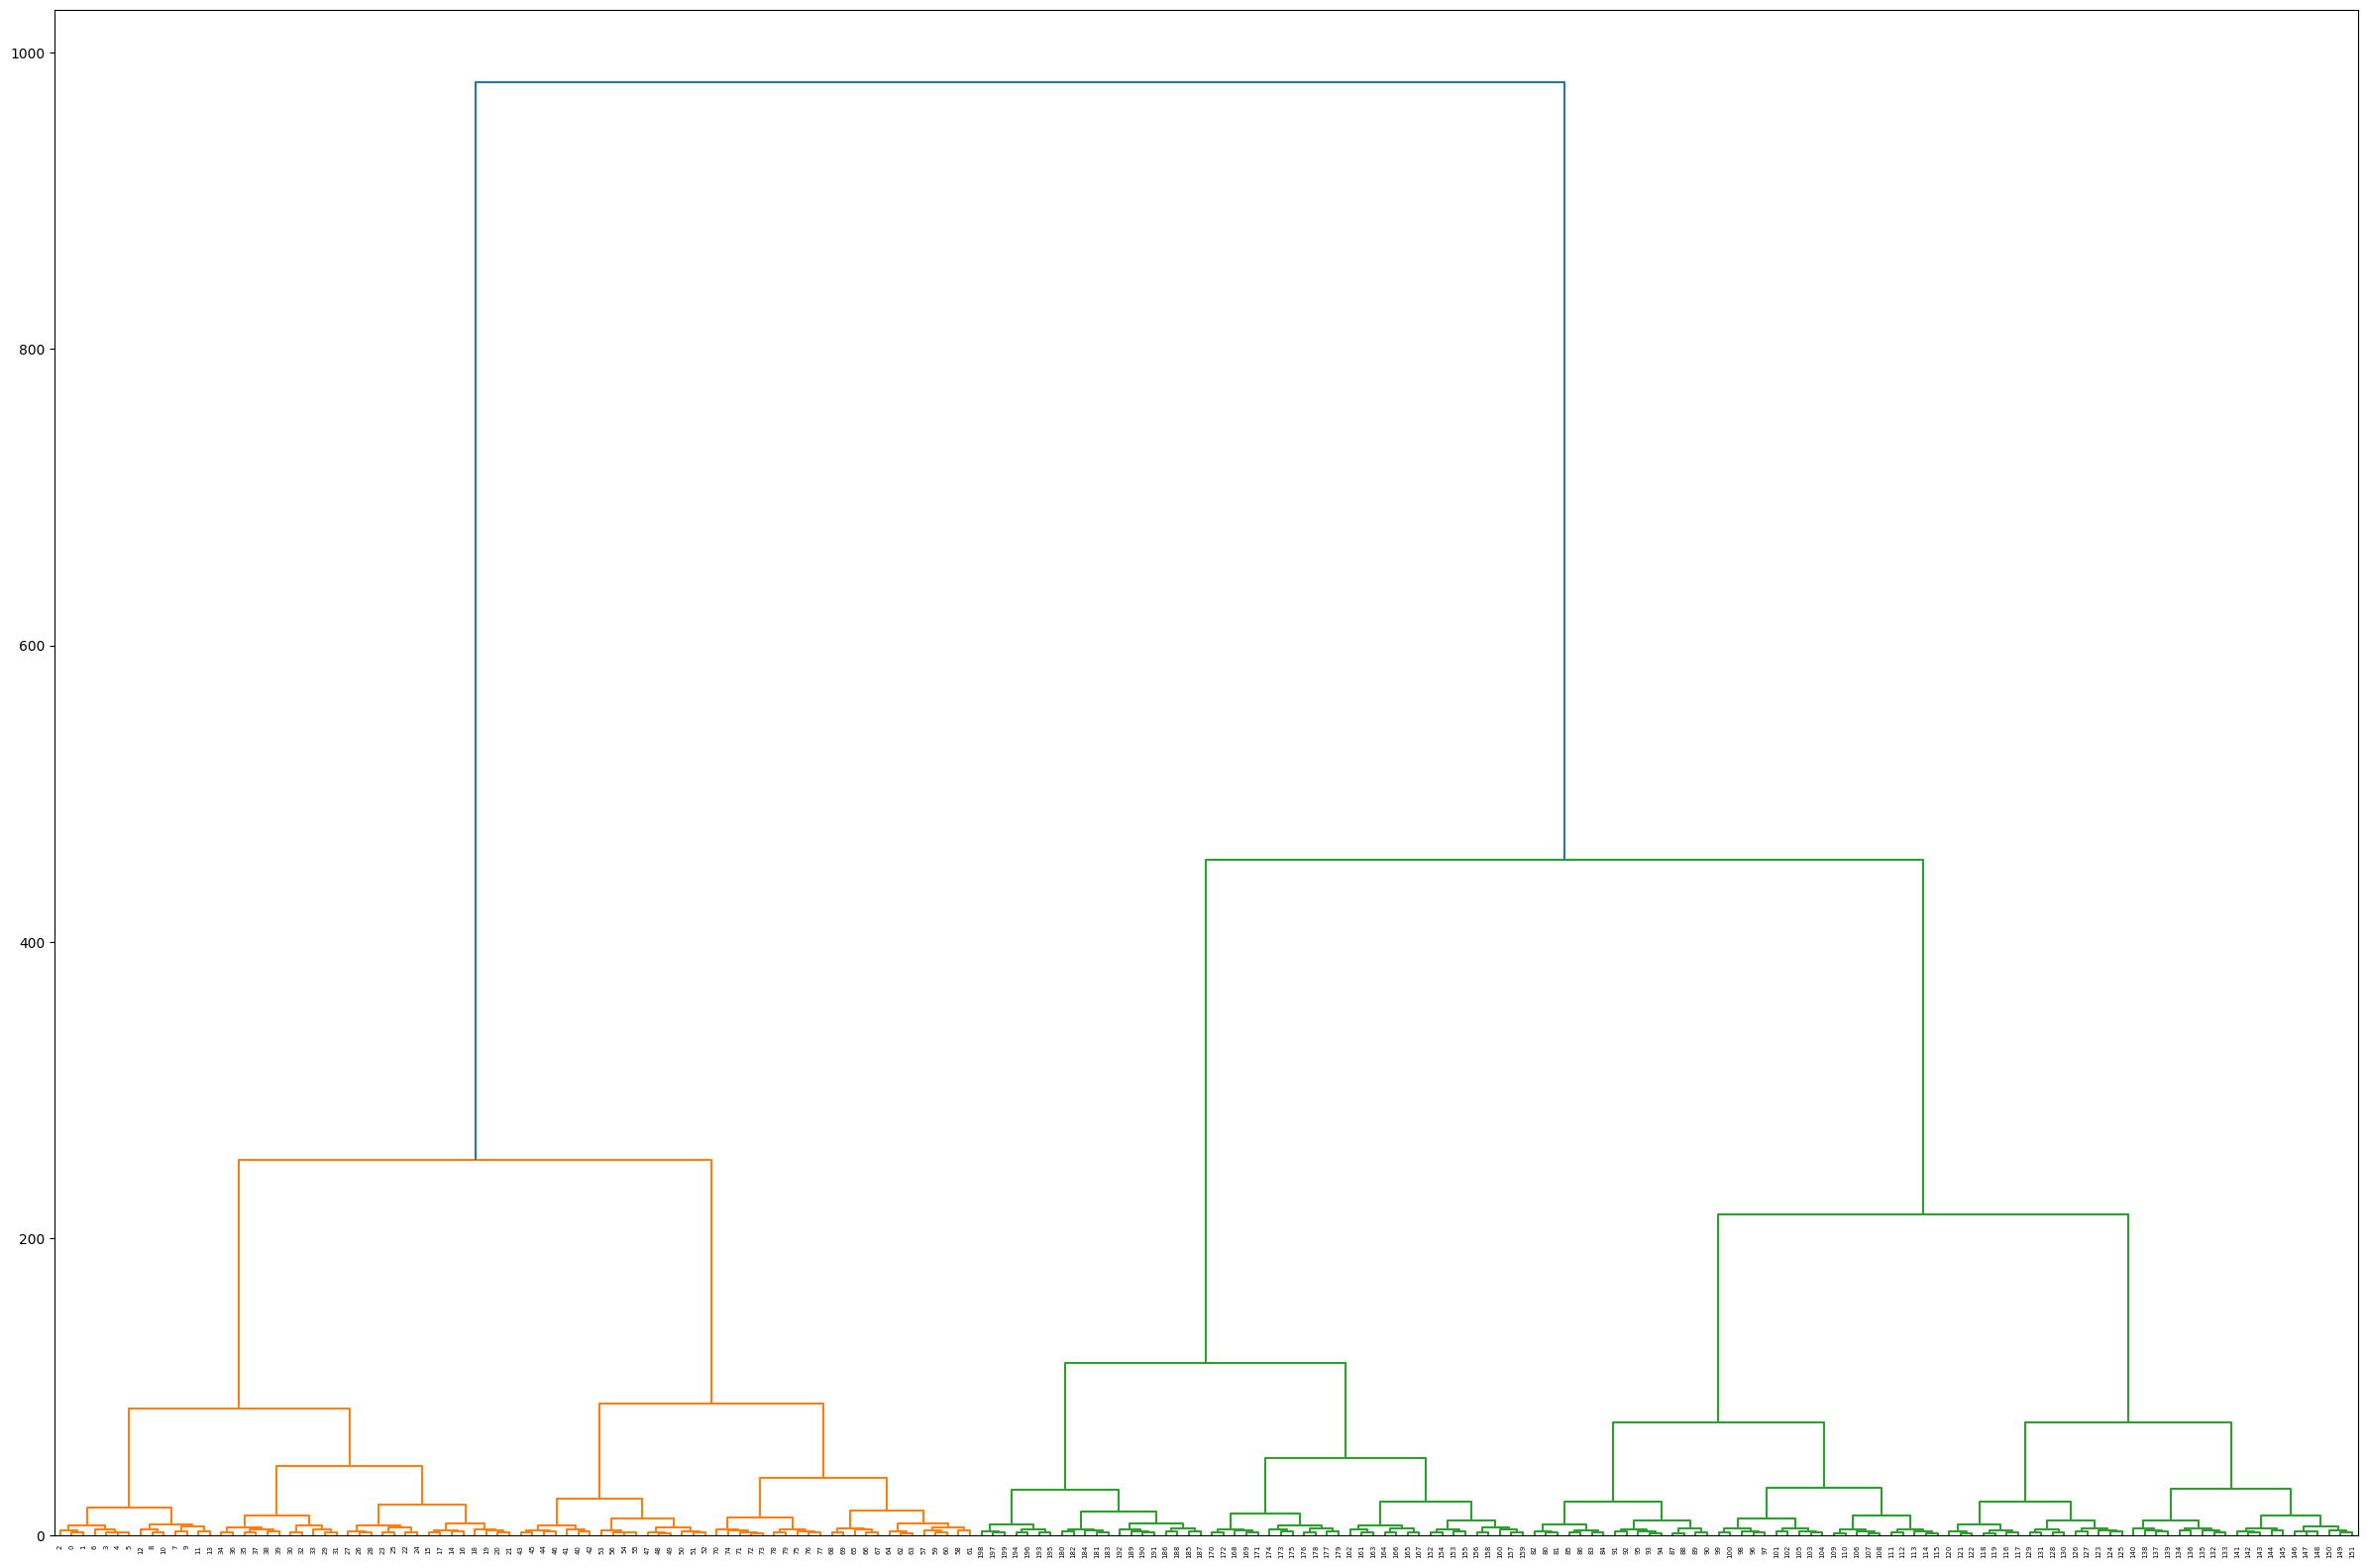

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
dendrogram(linkage_data)
plt.show()

In [30]:
hr_cluster = AgglomerativeClustering(n_clusters=6,metric = 'euclidean' )

In [31]:
hr_cluster.fit(final_one)

AgglomerativeClustering(n_clusters=6)

In [35]:
data_ori = pd.read_csv('/content/Mall_Customers.csv')

In [38]:
data_ori['hr_label'] = hr_cluster.fit_predict(final_one)

In [40]:
data_ori.groupby('hr_label').mean(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
hr_label,,,,
0,60.5,44.475000,45.600000,51.050000
1,20.5,34.650000,24.450000,49.275000
2,134.5,37.333333,72.444444,52.055556
3,166.5,37.571429,83.785714,48.321429
4,98.5,41.027778,60.055556,48.888889
5,190.5,36.600000,109.700000,52.000000


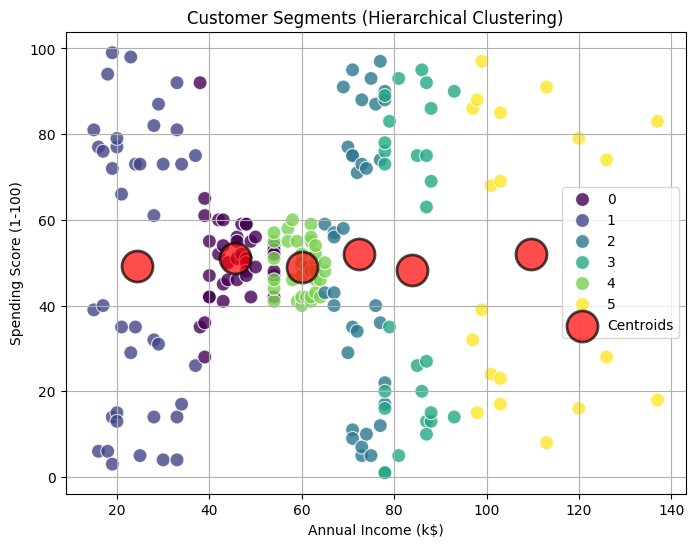

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visualization
plt.figure(figsize=(8, 6))

# Create the scatter plot
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='hr_label',
    data=data_ori,
    palette='viridis',
    s=100, # size of points
    alpha=0.8 # transparency of points
)

# Calculate the centroids for each cluster
centroids = data_ori.groupby('hr_label')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Plot the centroids
plt.scatter(
    centroids['Annual Income (k$)'],
    centroids['Spending Score (1-100)'],
    marker='o',
    s=500, # size of centroid markers
    c='red',
    edgecolors='black',
    linewidth=2,
    label='Centroids',
    alpha=0.7
)

plt.title('Customer Segments (Hierarchical Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

* Cluster 0: Oldest, Income Medium, Spending Medium
* Cluster 1: Lowest Income, Spending Low
* Cluster 2: Highest Income, Lowest Spending, More Male
* Cluster 3: High Income, Highest Spending
* Cluster 4: Young Age, Medium Income, Medium Spending, More Female
* Cluster 5: Young, Low Income, High Spending

In [52]:
from sklearn.metrics import silhouette_score
print(silhouette_score(final_one, hr_cluster.fit_predict(final_one)))

0.5199538484491092
